In [18]:
from modeler.modeler import Modeler as m
from database.market import Market
from database.adatabase import ADatabase
import pandas as pd
import matplotlib.pyplot as plt
import statistics

In [2]:
market = Market()
market.connect()
aapl = market.retrieve_ticker_prices("prices","AAPL")
market.disconnect()

In [3]:
strat = ADatabase("cfa")

In [7]:
strat.connect()
recs = strat.retrieve("2022_sim")
strat.disconnect()

In [13]:
aapl_recs = recs[recs["ticker"]=="AAPL"]

In [9]:
aapl
for i in range(14):
    aapl[str(i)] = aapl["adjClose"].shift(i)
aapl["y"] = aapl["adjClose"].shift(-1)
aapl.dropna(inplace=True)

In [10]:
aapl["date"] = pd.to_datetime(aapl["date"])

In [12]:
aapl["year"] = [x.year for x in aapl["date"]]
aapl["quarter"] = [x.quarter for x in aapl["date"]]

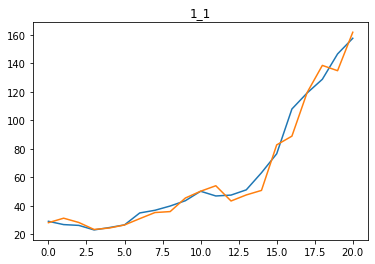

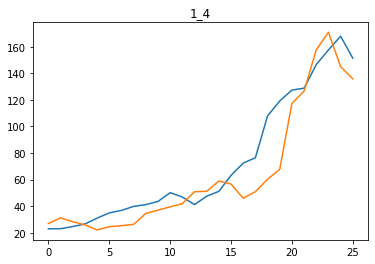

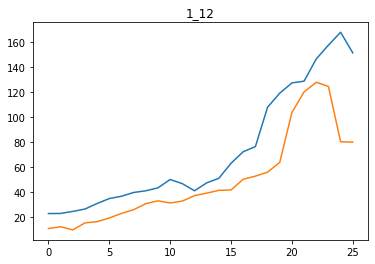

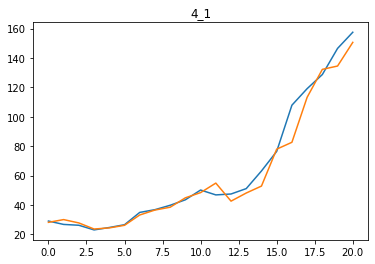

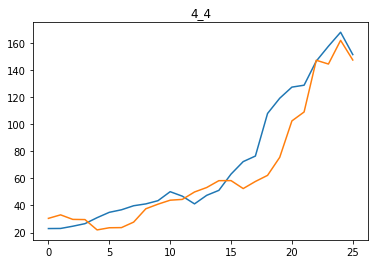

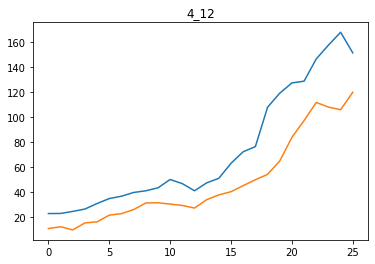

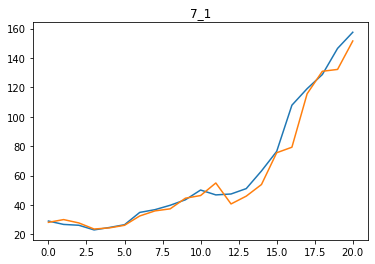

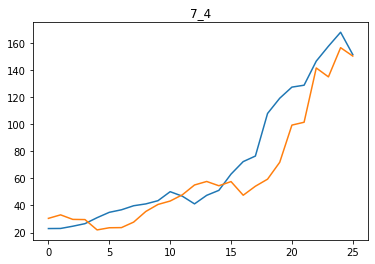

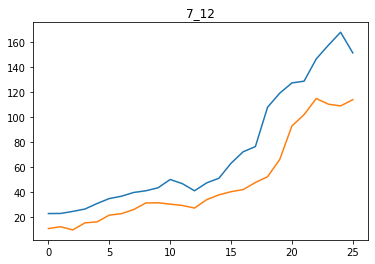

In [19]:
for training_year in [1,4,7]:
    for projection_value in [1,4,12]:
        iteration_rec = aapl_recs[(aapl_recs["training_year"]==training_year) & (aapl_recs["projection_value"]==projection_value)]
        viz = aapl.merge(iteration_rec,on=["year","quarter"]).sort_values("date").groupby(["year","quarter"]).mean().reset_index()
        viz["diff"] = viz["prediction"] - viz["adjClose"]
        plt.plot(viz["adjClose"])
        plt.plot(viz["prediction"])
        plt.title(f"{training_year}_{projection_value}")
        plt.show()

In [5]:
year = 2021
aapl["year"] = [x.year for x in aapl["date"]]
prediction_data = aapl[aapl["year"]==2021].reset_index()
training_data = aapl[aapl["year"]==2020].reset_index()
X = training_data[[str(x) for x in range(14)]]
y = training_data["y"]

In [6]:
# light_model = m.light_regression({"X":X,"y":y})
# cat_model = m.cat_regression({"X":X,"y":y})
xgb_model = m.xgb_regression({"X":X,"y":y})

In [7]:
models = []
models.append(xgb_model)

In [8]:
heh = pd.DataFrame(models)

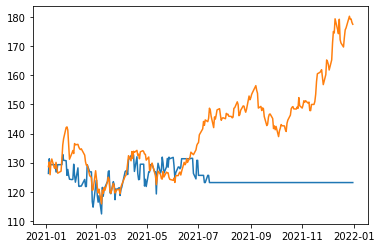

In [9]:
analysis = []
for row in heh.iterrows():
    model = row[1]["model"]
    factors = prediction_data[[str(x) for x in range(14)]].copy()
    predictions = model.predict(factors)
    viz = prediction_data[["date","adjClose"]].copy()
    viz["predict"] = predictions
    plt.plot(viz["date"],viz["predict"])
    plt.plot(viz["date"],viz["adjClose"])
    plt.show()


In [10]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score

In [11]:
mape = mean_absolute_percentage_error(viz["adjClose"],viz["predict"])
r2 = r2_score(viz["adjClose"],viz["predict"])

In [12]:
print(mape,r2)

0.10984886666091219 -1.319988115375832


In [13]:
heh["model"].item()

XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.3, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=10, max_depth=8, min_child_depth=1,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='approx', validate_parameters=1,
             verbosity=0)